In [1]:
import requests
import pandas as pd
import seaborn as sns
from io import BytesIO
from tqdm import tqdm

In [2]:
page = 1
url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20201030&sosok=&page={page}".format(page=page)
resp = requests.get(url)
html = BytesIO(resp.content)
df = pd.read_html(html)[0]

In [3]:
df

날짜       개인     외국인     기관계      기관                             \
          날짜       개인     외국인     기관계    금융투자     보험 투신(사모)    은행 기타금융기관   
0   20.10.30  14140.0 -9780.0 -4438.0 -3274.0 -139.0 -714.0  -6.0  -11.0   
1   20.10.29   9814.0 -5377.0 -4755.0 -3986.0   98.0 -236.0  37.0  -17.0   
2   20.10.28   1532.0   133.0 -1767.0 -1593.0 -425.0  380.0  -4.0   28.0   
3   20.10.27   1069.0  1046.0 -2497.0 -2305.0  128.0  -77.0  10.0    4.0   
4   20.10.26  -1127.0 -1437.0  2718.0   828.0  297.0  861.0  17.0   -5.0   
5        NaN      NaN     NaN     NaN     NaN    NaN    NaN   NaN    NaN   
6        NaN      NaN     NaN     NaN     NaN    NaN    NaN   NaN    NaN   
7        NaN      NaN     NaN     NaN     NaN    NaN    NaN   NaN    NaN   
8   20.10.23  -2723.0   388.0  2334.0   636.0  196.0  662.0 -16.0   -1.0   
9   20.10.22    679.0  -734.0    76.0   433.0  305.0 -538.0  -6.0   13.0   
10  20.10.21  -1283.0  -246.0  1426.0  2151.0  472.0 -164.0   9.0   24.0   
11  20.10.20  -2925.0   437.0  2605.0  2223.0  -73.0 -257.0  -2.0  -20.0   
12  20.10.19  -3424.0   344.0  2968.0  4506.0 -123.0  205.0 -12.0   14.0   
13       NaN      NaN     NaN     NaN     NaN    NaN    NaN   NaN    NaN   
14       NaN      NaN     NaN     NaN     NaN    NaN    NaN   NaN    NaN   

             기타법인  
      연기금등   기타법인  
0   -295.0   78.0  
1   -652.0  319.0  
2   -153.0  102.0  
3   -256.0  381.0  
4    722.0 -155.0  
5      NaN    NaN  
6      NaN    NaN  
7      NaN    NaN  
8    856.0    0.0  
9   -131.0  -21.0  
10 -1065.0  103.0  
11   733.0 -117.0  
12 -1623.0  112.0  
13     NaN    NaN  
14     NaN    NaN

In [5]:
cols = df.columns
cols

df = pd.DataFrame(columns=cols)
df

Empty DataFrame
Columns: [(날짜, 날짜), (개인, 개인), (외국인, 외국인), (기관계, 기관계), (기관, 금융투자), (기관, 보험), (기관, 투신(사모)), (기관, 은행), (기관, 기타금융기관), (기관, 연기금등), (기타법인, 기타법인)]
Index: []

In [6]:
 df

Empty DataFrame
Columns: [(날짜, 날짜), (개인, 개인), (외국인, 외국인), (기관계, 기관계), (기관, 금융투자), (기관, 보험), (기관, 투신(사모)), (기관, 은행), (기관, 기타금융기관), (기관, 연기금등), (기타법인, 기타법인)]
Index: []

In [9]:
for page in tqdm(range(1, 392)) : #tqdm : for문이나 함수의 진행상태를 progress bar를 통해서 시각화 시켜준다. 
    url = "https://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20201030&sosok=&page={page}".format(page=page)
    resp = requests.get(url)
    html = BytesIO(resp.content)
    df_single = pd.read_html(html)[0].dropna()   #.dropna() : NA의 자료는 drop 시킨다.
    df = pd.concat([df, df_single])
df

100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [07:29<00:00,  1.15s/it]


날짜       개인     외국인     기관계      기관                               \
          날짜       개인     외국인     기관계    금융투자     보험  투신(사모)     은행 기타금융기관   
0   20.10.30  14140.0 -9780.0 -4438.0 -3274.0 -139.0  -714.0   -6.0  -11.0   
1   20.10.29   9814.0 -5377.0 -4755.0 -3986.0   98.0  -236.0   37.0  -17.0   
2   20.10.28   1532.0   133.0 -1767.0 -1593.0 -425.0   380.0   -4.0   28.0   
3   20.10.27   1069.0  1046.0 -2497.0 -2305.0  128.0   -77.0   10.0    4.0   
4   20.10.26  -1127.0 -1437.0  2718.0   828.0  297.0   861.0   17.0   -5.0   
..       ...      ...     ...     ...     ...    ...     ...    ...    ...   
8   05.01.14  -3914.0  1892.0  2022.0  -133.0 -134.0  1661.0   91.0  117.0   
9   05.01.13   -533.0  -269.0   802.0  -628.0   -7.0   404.0   67.0   54.0   
10  05.01.12     16.0   966.0  -982.0  -107.0    9.0  -186.0  -56.0  103.0   
11  05.01.11   -648.0   -35.0   682.0   270.0   73.0   262.0  101.0  -11.0   
12  05.01.10    150.0   440.0  -590.0   192.0   40.0  -806.0   42.0   20.0   

            기타법인  
     연기금등   기타법인  
0  -295.0   78.0  
1  -652.0  319.0  
2  -153.0  102.0  
3  -256.0  381.0  
4   722.0 -155.0  
..    ...    ...  
8   419.0    0.0  
9   912.0    0.0  
10 -744.0    0.0  
11  -12.0    0.0  
12  -78.0    0.0  

[3910 rows x 11 columns]

In [10]:
df.reset_index(drop=True, inplace=True)
df

날짜       개인     외국인     기관계      기관                               \
            날짜       개인     외국인     기관계    금융투자     보험  투신(사모)     은행 기타금융기관   
0     20.10.30  14140.0 -9780.0 -4438.0 -3274.0 -139.0  -714.0   -6.0  -11.0   
1     20.10.29   9814.0 -5377.0 -4755.0 -3986.0   98.0  -236.0   37.0  -17.0   
2     20.10.28   1532.0   133.0 -1767.0 -1593.0 -425.0   380.0   -4.0   28.0   
3     20.10.27   1069.0  1046.0 -2497.0 -2305.0  128.0   -77.0   10.0    4.0   
4     20.10.26  -1127.0 -1437.0  2718.0   828.0  297.0   861.0   17.0   -5.0   
...        ...      ...     ...     ...     ...    ...     ...    ...    ...   
3905  05.01.14  -3914.0  1892.0  2022.0  -133.0 -134.0  1661.0   91.0  117.0   
3906  05.01.13   -533.0  -269.0   802.0  -628.0   -7.0   404.0   67.0   54.0   
3907  05.01.12     16.0   966.0  -982.0  -107.0    9.0  -186.0  -56.0  103.0   
3908  05.01.11   -648.0   -35.0   682.0   270.0   73.0   262.0  101.0  -11.0   
3909  05.01.10    150.0   440.0  -590.0   192.0   40.0  -806.0   42.0   20.0   

              기타법인  
       연기금등   기타법인  
0    -295.0   78.0  
1    -652.0  319.0  
2    -153.0  102.0  
3    -256.0  381.0  
4     722.0 -155.0  
...     ...    ...  
3905  419.0    0.0  
3906  912.0    0.0  
3907 -744.0    0.0  
3908  -12.0    0.0  
3909  -78.0    0.0  

[3910 rows x 11 columns]

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [14]:
df.columns = df.columns.droplevel()

In [18]:
df.head()

,날짜,개인,외국인,기관계,금융투자,보험,투신(사모),은행,기타금융기관,연기금등,기타법인
0,20.10.30,14140.0,-9780.0,-4438.0,-3274.0,-139.0,-714.0,-6.0,-11.0,-295.0,78.0
1,20.10.29,9814.0,-5377.0,-4755.0,-3986.0,98.0,-236.0,37.0,-17.0,-652.0,319.0
2,20.10.28,1532.0,133.0,-1767.0,-1593.0,-425.0,380.0,-4.0,28.0,-153.0,102.0
3,20.10.27,1069.0,1046.0,-2497.0,-2305.0,128.0,-77.0,10.0,4.0,-256.0,381.0
4,20.10.26,-1127.0,-1437.0,2718.0,828.0,297.0,861.0,17.0,-5.0,722.0,-155.0


In [24]:
import itertools as it
list(it.combinations(['개인', '외국인', '기관계'], 2))

[('개인', '외국인'), ('개인', '기관계'), ('외국인', '기관계')]

In [20]:
sns.set_context('talk')

('개인', '외국인')
('개인', '기관계')
('외국인', '기관계')


C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


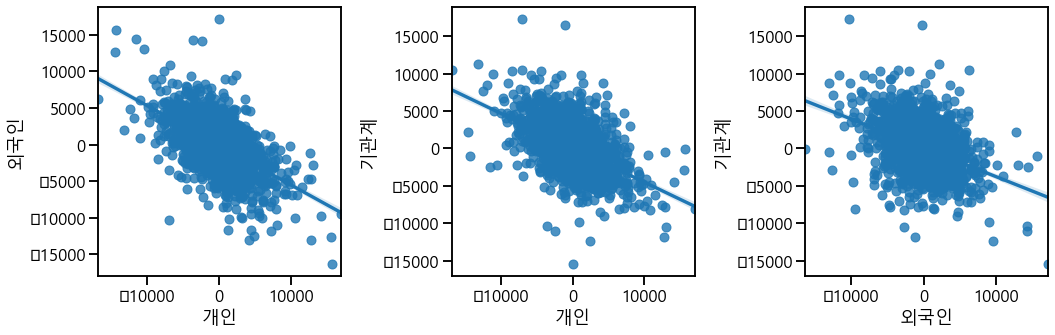

In [30]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(15,5)
for ax, comb in zip(axes, it.combinations(['개인', '외국인', '기관계'], 2)) :
    print(comb)
    sns.regplot(comb[0], comb[1], df, ax=ax)
fig.tight_layout()